In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

In [2]:
X,y = mglearn.datasets.make_forge()
# print(X)
# print(y)

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Second Feature')

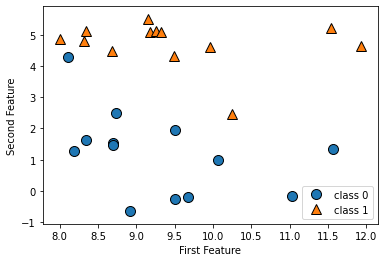

In [3]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["class 0", "class 1"],loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")

Text(0, 0.5, 'Target')

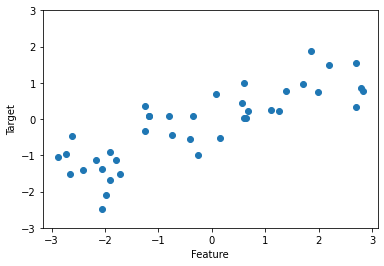

In [4]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('Feature')
plt.ylabel('Target')
# print(X)
# print(y)

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# print(cancer.keys())
# print(cancer)

In [6]:
print('Sample counts per class:\n{0}'.format({n:v for n,v in zip(cancer.target_names,np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:{0}".format(boston.data.shape))

Data shape:(506, 13)


In [8]:
X,y = mglearn.datasets.load_extended_boston()
print("X.shape:{}".format(X.shape))

X.shape:(506, 104)


D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


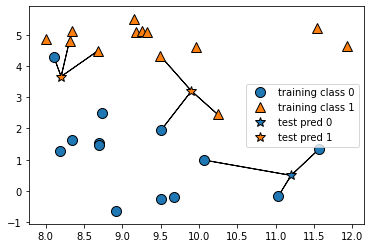

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [10]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
print("Test set predictions:{}".format(clf.predict(X_test)))
print("The Classifier score:{}".format(clf.score(X_test,y_test)))

Test set predictions:[1 0 1 0 1 0 0]
The Classifier score:0.8571428571428571


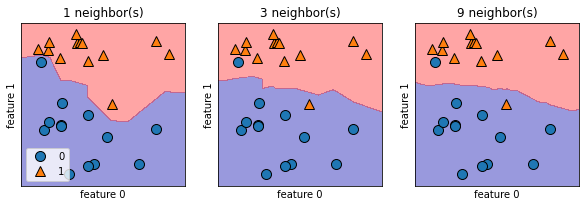

In [13]:
fig,axes = plt.subplots(1,3,figsize=(10,3))
for n_neighbors,ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=0.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

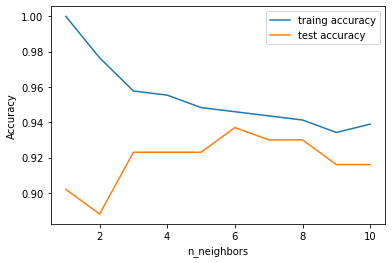

In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
plt.plot(neighbors_settings,training_accuracy,label='traing accuracy')
plt.plot(neighbors_settings,test_accuracy,label='test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

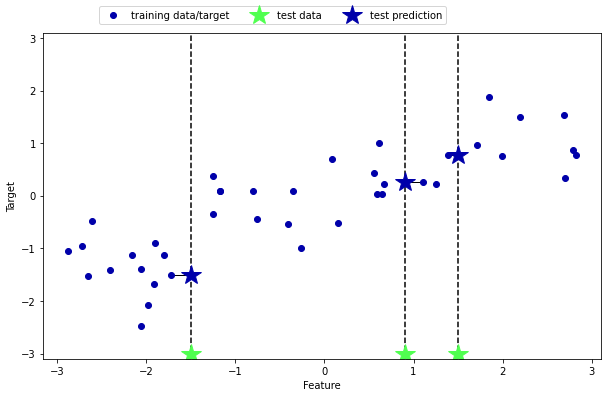

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

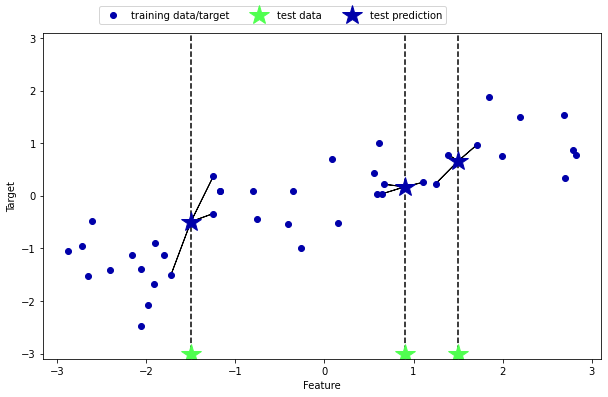

In [16]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [17]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print("Test set predictions:\n{0}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [18]:
print("Test set R^2: {:.2f}".format(reg.score(X_test,y_test)))

Test set R^2: 0.83


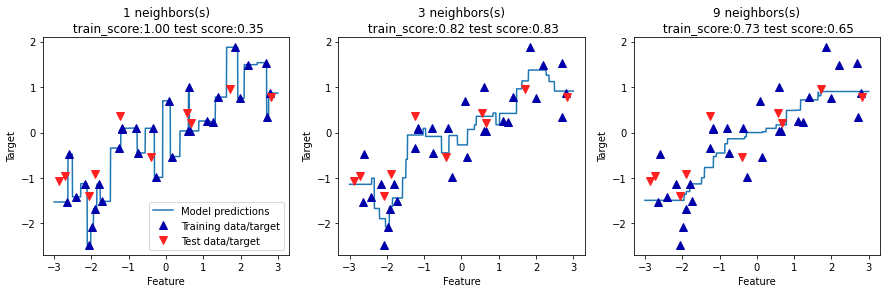

In [19]:
fig,axes = plt.subplots(1,3,figsize=(15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    ax.set_title("{} neighbors(s)\n train_score:{:.2f} test score:{:.2f}".format(n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions","Training data/target","Test data/target"],loc="best")

In [20]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression()
lr.fit(X_train,y_train)
# 参数w保存在coef_属性中，截距b保存在intercept_
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [25]:
X, y = mglearn.datasets.load_extended_boston()
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [26]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test,y_test)))

Training set score: 0.89
Test set score: 0.75


In [29]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of futures used: {}".format(sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of futures used: 4


In [31]:
lasso001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of futures used: {}".format(sum(lasso001.coef_ != 0)))

Training set score: 0.94
Test set score: 0.74
Number of futures used: 67


D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


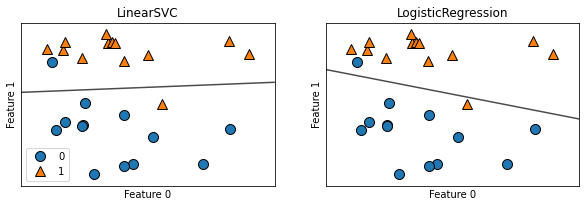

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2,figsize=(10,3))
for model,ax in zip([LinearSVC(), LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc='best')

In [39]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,
                                                 stratify=cancer.target,random_state=42)
logreg = LogisticRegression().fit(X_train,y_train)
print("training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("test set score: {:.3f}".format(logreg.score(X_test,y_test)))

training set score: 0.955
test set score: 0.958


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("training set score: {:.3f}".format(logreg100.score(X_train,y_train)))
print("test set score: {:.3f}".format(logreg100.score(X_test,y_test)))

training set score: 0.944
test set score: 0.958


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


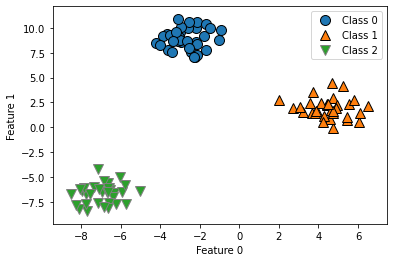

In [46]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])